### AIDI 2004-02 - AI IN ENTERPRISE SYSTEMS
Assignemnt : Lab Assignment 4

Submitted by : Devangraj Vaidya  
Student # 100780615

Prof : Sajeeva Salgadoe

### Loading Data

In [1]:
import pandas as pd
import pathlib
import os


data_dir = '../Lab4/'
filename = 'Fish.csv'
path_to_data = pathlib.Path(os.path.join(data_dir, filename))

if path_to_data.exists():
    df = pd.read_csv(path_to_data)
else:
    raise FileNotFoundError(f'Please check the file path, the location'
                            f'provided does not contain any file with the name: {filename}')
    df = None
    
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### Performing Exploratory Data Analysis

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


The dataset contains **159 samples and 7 variables**.

In [3]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [4]:
# check the number of classes/species in the dataset.
len(df['Species'].value_counts())

7

We can see that there are **7 different species (classes)**.

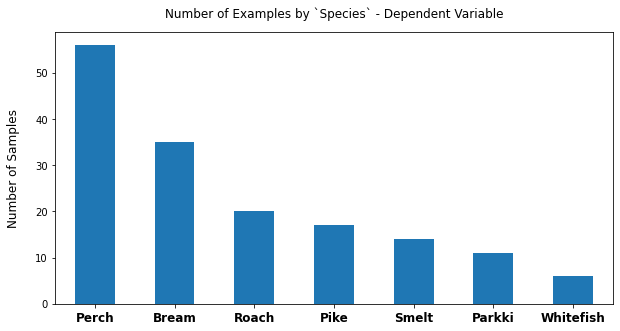

In [5]:
import matplotlib.pyplot as plt


# Plot a graph to visualize the number of samples for each dependent variable category.
fig, ax = plt.subplots(figsize=(10,5))

# Count the number samples for each category and plot.
df['Species'].value_counts().plot(kind="bar", ax=ax)

# Other formatting settings.
ax.set_title("Number of Examples by `Species` - Dependent Variable",
             fontdict={"size": 12, "color": "#000"}, pad=15, loc="center");

ax.set_ylabel("Number of Samples", fontdict={"size": 12, "color":"#000"}, labelpad=15);
plt.xticks(fontsize=12, weight="bold", color="#000", rotation=0);

In [6]:
# Creating a sweetviz report for a more detailed comparison of variables in the dataset.
import sweetviz as sv
import warnings


warnings.filterwarnings('ignore')
path_to_report = '../docs/html/SWEETVIZ_REPORT.html'

if not pathlib.Path(path_to_report).exists():
    mushrooms_report = sv.analyze(df)
    mushrooms_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Data Preparation for Model Training

In [7]:
# Defining x and y variables for the algorithm
X = df.drop('Species', axis=1)
y = df['Species']

Setting the train-test split at **70 / 30**.

In [8]:
from sklearn.model_selection import train_test_split

# Splitting data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100, stratify=y)

### Model Creation and Training

As per our finings in the EDA, we are planning to use the **Linear Support Vector Classifier**

In [9]:
from sklearn.svm import SVC

# Defining and fitting a SVM instance
model = SVC(kernel='linear', random_state=100)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=100)

### Model Testing and Exporting

In [10]:
model.score(X_test, y_test)

0.9166666666666666

Since our model accuracy is **more than 90%**, we are good to proceed our model for deployment.

In [11]:
# Save model
import pickle

with open("model.pkl",'wb') as f:
    pickle.dump(model, f)